In [1]:
# import the necessary packages
import os
# initialize the path to the *original* input directory of images
ORIG_INPUT_DATASET = "DS"
# initialize the base path to the *new* directory that will contain
# our images after computing the training and testing split
BASE_PATH = "SHI_sample"
# define the names of the training, testing
# directories
TRAIN = "training"
TEST = "evaluation"
# initialize the list of class label names
CLASSES = ["Abdomen", "Chest", "Head"]
# set the batch size
batch_size = 32
# initialize the label encoder file path and the output directory to
# where the extracted features (in CSV file format) will be stored

path = "/content/drive/My Drive/SHI_sample/DS"

image_data = []
image_label = []
image_labels = []
CT_images = []
CT_labels = []


In [2]:
# mounting the google drive so that dataset can be processed
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
import tensorflow as tf
import shutil, sys 

In [4]:
# Creating the directories for each category of CT image. The command will check if it is already present or not as well
!if [ -d '/content/drive/My Drive/SHI_sample/DS/Abdomen' ]; then echo "Directory Abdomen already exist" ; else mkdir '/content/drive/My Drive/SHI_sample/DS/Abdomen' && echo "Directory Abdomen created"; fi
!if [ -d '/content/drive/My Drive/SHI_sample/DS/Chest' ]; then echo "Directory Chest already exist" ; else mkdir '/content/drive/My Drive/SHI_sample/DS/Chest' && echo "Directory Chest created"; fi
!if [ -d '/content/drive/My Drive/SHI_sample/DS/Head' ]; then echo "Directory Head already exist" ; else mkdir '/content/drive/My Drive/SHI_sample/DS/Head' && echo "Directory Head created"; fi


Directory Abdomen already exist
Directory Chest already exist
Directory Head already exist


In [5]:
Abdomen_folder_path = "/content/drive/My Drive/SHI_sample/DS/Abdomen"
Abdomen_images = os.listdir("/content/drive/My Drive/SHI_sample/DS/Abdomen")
Head_folder_path = "/content/drive/My Drive/SHI_sample/DS/Head"
Head_images = os.listdir("/content/drive/My Drive/SHI_sample/DS/Head")
Chest_folder_path = "/content/drive/My Drive/SHI_sample/DS/Chest"
Chest_images = os.listdir("/content/drive/My Drive/SHI_sample/DS/Chest")
CNN_path='/content/drive/My Drive/SHI_sample/CNNmodel'

Moving the files from the primary data set folder to respective folders 

In [6]:
for file_count in range(0,500):
  if len(Abdomen_images) != 500:
    shutil.move('/content/drive/My Drive/SHI_sample/DS/Abdomen_CT Sample#'+ str(file_count) +'.jpeg', '/content/drive/My Drive/SHI_sample/DS/Abdomen')

In [7]:
for file_count in range(0,500):
  if len(Chest_images) != 500:
    shutil.move('/content/drive/My Drive/SHI_sample/DS/Chest_CT Sample#'+ str(file_count) +'.jpeg', '/content/drive/My Drive/SHI_sample/DS/Chest')
    

In [8]:
for file_count in range(0,500):
  if len(Head_images) != 500:
    shutil.move('/content/drive/My Drive/SHI_sample/DS/Head_CT Sample#'+ str(file_count) +'.jpeg', '/content/drive/My Drive/SHI_sample/DS/Head')
  

In [9]:
dataset_dir = os.listdir(path)
categories = sorted(dataset_dir)
print(categories)

['Abdomen', 'Chest', 'Head']


In [10]:
import cv2

In [11]:
# Defining a function to split the images from the actual path and creating an array for all the images and labels respectively
# Also, the function resizes the images to 32*32
 
def image_label_split(categories, path):
  for i, c in enumerate(categories):
    for files in os.listdir(path + "/" + c):
      input_extension = os.path.splitext(files)[1]
      dataset_path = os.path.join(path + "/" + c, files)
      final_label = dataset_path.split(os.path.sep)[-2]
      image = cv2.imread(dataset_path)         
      image_resized = cv2.resize(image, (32, 32))
      image_data.append(image_resized)
      image_label.append(final_label)
  
  CT_images = np.array(image_data)
  CT_labels = np.array(image_label)
  
  # return image_data, image_label
  return CT_images, CT_labels

In [12]:
print("Number of Abdomen CT images are:", len(Abdomen_images))
print("Number of Chest CT images are:", len(Chest_images))
print("Number of Head CT images are:", len(Head_images))

Number of Abdomen CT images are: 500
Number of Chest CT images are: 500
Number of Head CT images are: 500


In [13]:
# The function is called to split the image and the labels from the given dataset 
final_image_data, final_image_label = image_label_split(categories, path)

In [14]:
# Creating individual id's for the labels of each images

convert_label_no = {a:i for i,a in enumerate(np.unique(final_image_label))}
convert_no_label = {a:j for j,a in convert_label_no.items()}
label_no = np.array([convert_label_no[x] for x in final_image_label])

In [15]:
# Importing necessary libraries for one-hot encoding
#Normalization of the images and one-hot encoding of the labels

from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

x_normalized_image = np.array(final_image_data / 255.0 - 0.5 )
label_binarizer = LabelBinarizer()
y_one_hot_label = label_binarizer.fit_transform(final_image_label)

In [16]:
# Splitting the training and testing data for CNN model with 70:30 training ratio

x_train, x_test, y_train, y_test = train_test_split(x_normalized_image, y_one_hot_label, train_size = 0.7,  shuffle = True, random_state = 42)

In [17]:
N_CATEGORY =len(convert_label_no)

print("x_train shape:", x_train.shape, "\ny_train shape:", y_train.shape, "\nx_test shape:", x_test.shape, "\ny_test shape:", y_test.shape, "\nno. of categories:", N_CATEGORY)

x_train shape: (1050, 32, 32, 3) 
y_train shape: (1050, 3) 
x_test shape: (450, 32, 32, 3) 
y_test shape: (450, 3) 
no. of categories: 3


In [18]:
# Performing necessary preprocessing using the ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Importing necessary libraries to create a CNN model. The model is defined with a 2D Convolution.
Dropout has been added to reduce the overfitting

In [19]:
from keras.models import Model, Sequential, load_model
from keras.layers import Conv1D, MaxPool1D, Conv2D, Conv2DTranspose, UpSampling2D, MaxPool2D, MaxPooling2D, Flatten, BatchNormalization, Input, Dense, Dropout, Activation, Add, Concatenate
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.optimizers import Adam
from keras import regularizers
from keras.losses import categorical_crossentropy

In [20]:
def fit_model(x_train, y_train, x_test, y_test, lr):
  model = Sequential([
                      Conv2D(input_shape = (32,32,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu", name = 'Layer1'),
                      Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu", name = 'Layer2'),
                      MaxPool2D(pool_size = (2,2), strides = (2,2), name = 'Layer3'),

                      Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu", name = 'Layer4'),
                      Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu", name = 'Layer5'),
                      BatchNormalization(name = 'Layer6'),
                      Dropout(0.5, name = 'Layer7'),
                      MaxPool2D(pool_size = (2,2), strides = (2,2), name = 'Layer8'),
                    
                      Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu", name = 'Layer9'),
                      Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu", name = 'Layer10'),
                      Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu", name = 'Layer11'),
                      BatchNormalization(name = 'Layer12'),
                      Dropout(0.5, name = 'Layer13'),
                      MaxPool2D(pool_size = (2,2),strides = (2,2), name = 'Layer14'),
                    
                      Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu", name = 'Layer15'),
                      Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu", name = 'Layer16'),
                      Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu", name = 'Layer17'),
                      BatchNormalization(name = 'Layer18'),
                      Dropout(0.5, name = 'Layer19'),
                    
                      MaxPool2D(pool_size = (2,2),strides = (2,2), name = 'Layer20'),
                      Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu", name = 'Layer21'),
                      Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu", name = 'Layer22'),
                      Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu", name = 'Layer23'),
                      Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu", name = 'Layer24'),
                      BatchNormalization(name = 'Layer25'),
                      Dropout(0.5, name = 'Layer26'),
                    
                      MaxPool2D(pool_size = (2,2), strides = (2,2), name = 'Layer27'),
                      Flatten(name = 'Layer28'),
                    
                      Dropout(0.5, name = 'Layer29'),
                      Dense(units=4096, activation = "relu", name = 'Layer30'),
                      Dropout(0.5, name = 'Layer31'),
                      Dense(units=4096, activation = "relu", name = 'Layer32'),
                      Dense(units=3, activation = "softmax", name = 'Layer33'),
                      ])
  
  opt = Adam(lr)
  # Compiling the model with categorical crossentropy as loss function and Accuracy as the metric 
  model.compile(
      optimizer=opt, 
      loss=categorical_crossentropy, 
      metrics=['accuracy']
      )
    # Having recurrent checkpoints to save the best models
  ckpt_callback = ModelCheckpoint(
      CNN_path,
      monitor='accuracy', 
      verbose=1, 
      save_best_only=True, 
      mode='auto'
      )

  history = model.fit(
      datagen.flow(x_train, y_train, batch_size=32),
      steps_per_epoch=len(x_train) / 32, 
      epochs=5, 
      verbose=1,
      callbacks=[ckpt_callback],
      shuffle = True,
      validation_data = (x_test, y_test)
      )
  
  # pyplot.plot(history.history['accuracy'], label='train')
  # pyplot.plot(history.history['val_accuracy'], label='test')
  
  # pyplot.show()
  # pyplot.savefig("lr.png")

  # Saving the plot for loss between validation and training samples for each epoch 

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  #plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  pyplot.title('Loss lrate='+str(lr), pad=-50)
  plt.show()
  plt.savefig('loss.png')

  # Saving the plot for accuracy between validation and training samples for each epoch 

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  #plt.title('model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  pyplot.title('Accuracy lrate='+str(lr), pad=-50)
  plt.show()
  plt.savefig('CNN accuracy.png')
  model.save('/content/drive/My Drive/SHI_sample/CNNmodel/1106937_CNN.h5')
  




Epoch 1/5
33/32 [==============================] - ETA: 0s - loss: 10406.5830 - accuracy: 0.5971
Epoch 00001: accuracy improved from -inf to 0.59714, saving model to /content/drive/My Drive/SHI_sample/CNNmodel
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/SHI_sample/CNNmodel/assets
33/32 [==============================] - 153s 5s/step - loss: 10406.5830 - accuracy: 0.5971 - val_loss: 145085333504.0000 - val_accuracy: 0.3578
Epoch 2/5
33/32 [==============================] - ETA: 0s - loss: 65.9335 - accuracy: 0.5810
Epoch 00002: accuracy did not improve from 0.59714
33/32 [==============================] - 171s 5s/step - loss: 65.9335 - accuracy: 0.5810 - val_loss: 17620621312.0000 - val_accuracy: 0.3578
Epoch 3/5
33/32 [======================

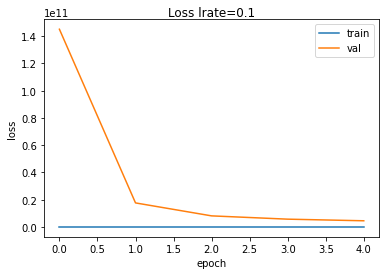

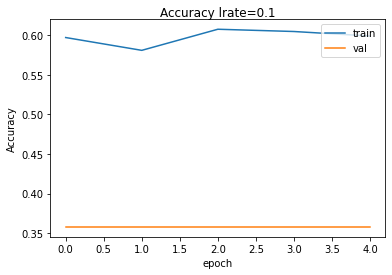

Epoch 1/5
33/32 [==============================] - ETA: 0s - loss: 59.7544 - accuracy: 0.6029
Epoch 00001: accuracy improved from -inf to 0.60286, saving model to /content/drive/My Drive/SHI_sample/CNNmodel
INFO:tensorflow:Assets written to: /content/drive/My Drive/SHI_sample/CNNmodel/assets
33/32 [==============================] - 174s 5s/step - loss: 59.7544 - accuracy: 0.6029 - val_loss: 3265133.0000 - val_accuracy: 0.3578
Epoch 2/5
33/32 [==============================] - ETA: 0s - loss: 1.1847 - accuracy: 0.6838
Epoch 00002: accuracy improved from 0.60286 to 0.68381, saving model to /content/drive/My Drive/SHI_sample/CNNmodel
INFO:tensorflow:Assets written to: /content/drive/My Drive/SHI_sample/CNNmodel/assets
33/32 [==============================] - 174s 5s/step - loss: 1.1847 - accuracy: 0.6838 - val_loss: 1824912.5000 - val_accuracy: 0.3578
Epoch 3/5
33/32 [==============================] - ETA: 0s - loss: 0.9156 - accuracy: 0.6238
Epoch 00003: accuracy did not improve from 0.6

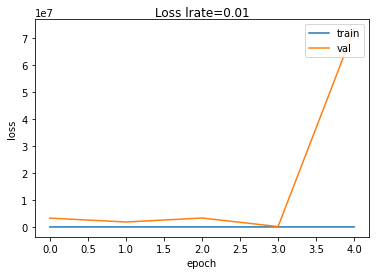

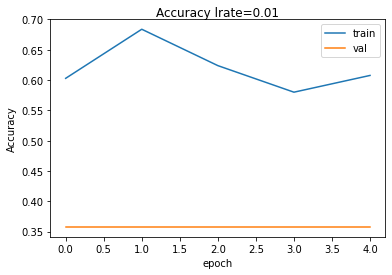

Epoch 1/5
33/32 [==============================] - ETA: 0s - loss: 1.3201 - accuracy: 0.6524
Epoch 00001: accuracy improved from -inf to 0.65238, saving model to /content/drive/My Drive/SHI_sample/CNNmodel
INFO:tensorflow:Assets written to: /content/drive/My Drive/SHI_sample/CNNmodel/assets
33/32 [==============================] - 148s 4s/step - loss: 1.3201 - accuracy: 0.6524 - val_loss: 236.5725 - val_accuracy: 0.3578
Epoch 2/5
33/32 [==============================] - ETA: 0s - loss: 0.8693 - accuracy: 0.6743
Epoch 00002: accuracy improved from 0.65238 to 0.67429, saving model to /content/drive/My Drive/SHI_sample/CNNmodel
INFO:tensorflow:Assets written to: /content/drive/My Drive/SHI_sample/CNNmodel/assets
33/32 [==============================] - 142s 4s/step - loss: 0.8693 - accuracy: 0.6743 - val_loss: 37.1556 - val_accuracy: 0.3578
Epoch 3/5
33/32 [==============================] - ETA: 0s - loss: 0.5059 - accuracy: 0.6562
Epoch 00003: accuracy did not improve from 0.67429
33/32 

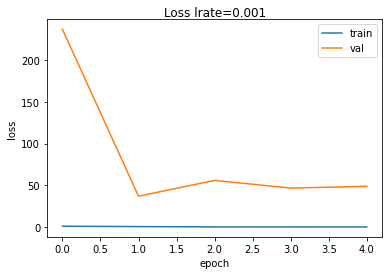

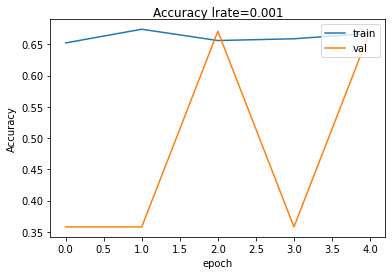

<Figure size 432x288 with 0 Axes>

In [21]:
from matplotlib import pyplot
# Setting Optimizer as Adam and defining the learning rate and its decay
# lr = [1E-1, 1E-2, 1E-3]
lr = [1E-1, 1E-2, 1E-3]
for i in range(len(lr)):
  # determine the plot number
  # plot_no = 420 + (i+1)
  # pyplot.subplot(plot_no)
  fit_model(x_train, y_train, x_test, y_test, lr[i])


Loading the saved model and evaluating it with the testing parameters

In [22]:
import tensorflow as tf
import tensorflow 

CNN_loaded_model = load_model('/content/drive/My Drive/SHI_sample/CNNmodel/1106937_CNN.h5')

cnn_test_eval = CNN_loaded_model.evaluate(x_test, y_test)
predicted_output = CNN_loaded_model.predict(x_test)
print(cnn_test_eval)


15/15 [==============================] - 5s 340ms/step - loss: 49.0315 - accuracy: 0.6711
[49.03151321411133, 0.6711111068725586]


In [23]:
# Finding an intermediate layer for feature extraction. layers[-2] and Layer32 are the same and hence, it is used as the layer for extracting the features
CNN_loaded_model.layers[-2]

In [24]:
CNN_loaded_model.get_layer('Layer32')

In [25]:
layer_name = 'Layer32'
feature_extractor_data = Model(inputs = CNN_loaded_model.inputs, outputs=CNN_loaded_model.get_layer(layer_name).output)
feature_extractor_data.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
Layer1 (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
Layer2 (Conv2D)              (None, 32, 32, 64)        36928     
_________________________________________________________________
Layer3 (MaxPooling2D)        (None, 16, 16, 64)        0         
_________________________________________________________________
Layer4 (Conv2D)              (None, 16, 16, 128)       73856     
_________________________________________________________________
Layer5 (Conv2D)              (None, 16, 16, 128)       147584    
_________________________________________________________________
Layer6 (BatchNormalization)  (None, 16, 16, 128)      

KNN Classifier

In [26]:
# Splitting and extracting the the images and label for test and train respectively

knn_image_train, knn_image_test, knn_label_train, knn_label_test = train_test_split(final_image_data, final_image_label, train_size = 0.7, random_state = 42, shuffle = True)
features_train = np.array(feature_extractor_data(knn_image_train))
features_test = np.array(feature_extractor_data(knn_image_test))
knn_train_op =np.array(knn_label_train)
knn_test_op =np.array(knn_label_test)

In [27]:
print("Shape of the training images:", features_train.shape, "\nShape of testing images:", features_test.shape, "\nShape of training labels: ",knn_train_op.shape, "\nShape of Testing Labels: ", knn_test_op.shape)

Shape of the training images: (1050, 4096) 
Shape of testing images: (450, 4096) 
Shape of training labels:  (1050,) 
Shape of Testing Labels:  (450,)


In [28]:
# Importing necessary libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# looping between 3 and 10 so that a list of k with values 3,5,7,9 be taken for knn
k_range = list(range(3,10,2))

# creating Python dictionary for scores 
scores_train = []


# appending the scores in the dictionary for each k and fitting the model
for k in k_range:
  k_nn_model = KNeighborsClassifier(n_neighbors=k)
  k_nn_model.fit(features_train, knn_train_op)
  # print(k_neighbor.score(features_train, knn_train_op))
  # # knn_train_output = k_neighbor.predict(features_train)
  x_pred = k_nn_model.predict(features_train)
  scores_train.append(metrics.accuracy_score(knn_train_op, x_pred))

print(scores_train)

[0.7609523809523809, 0.7409523809523809, 0.7238095238095238, 0.7228571428571429]


We find that the best value is with k = 3

In [29]:
for k in range(0,4):
  print("Accuracy for k =", k_range[k], "is: ", scores_train[k] )

Accuracy for k = 3 is:  0.7609523809523809
Accuracy for k = 5 is:  0.7409523809523809
Accuracy for k = 7 is:  0.7238095238095238
Accuracy for k = 9 is:  0.7228571428571429


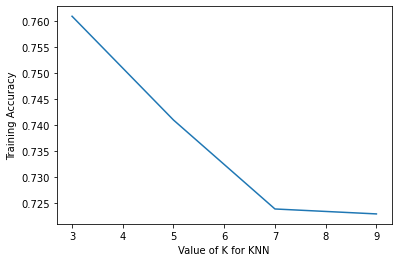

In [30]:
# import Matplotlib
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and training accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores_train)
plt.xlabel('Value of K for KNN')
plt.ylabel('Training Accuracy')
plt.savefig('knn_training_accuracy.png')

In [31]:
print(confusion_matrix(knn_train_op, x_pred))
print(classification_report(knn_train_op, x_pred))

[[256  71  25]
 [ 27 326   6]
 [ 86  76 177]]
              precision    recall  f1-score   support

     Abdomen       0.69      0.73      0.71       352
       Chest       0.69      0.91      0.78       359
        Head       0.85      0.52      0.65       339

    accuracy                           0.72      1050
   macro avg       0.74      0.72      0.71      1050
weighted avg       0.74      0.72      0.71      1050



In [32]:
# saving the knn model to a pickle file
with open('1106937_KNN.pkl', 'wb') as f:
    pickle.dump(k_nn_model, f)

# loading the saved file
with open('1106937_KNN.pkl', 'rb') as f:
    knn_clf = pickle.load(f)

In [33]:
# Using the loaded model to evaluate the test variables. the model will run for k = 3 as that was found to be the best model in training
knn_clf.fit(features_test, knn_test_op)
y_pred_knn = knn_clf.predict(features_test)
accuracy_knn = (metrics.accuracy_score(knn_test_op, y_pred_knn))*100
print('Accuracy of knn model is equal ' + str(round(accuracy_knn, 2)) + ' %.')
print("\nConfusion Matrix KNN\n",confusion_matrix(knn_test_op, y_pred_knn))
print("\nConfusion Report KNN\n",classification_report(knn_test_op, y_pred_knn))

Accuracy of knn model is equal 69.56 %.

Confusion Matrix KNN
 [[ 95  39  14]
 [ 13 128   0]
 [ 37  34  90]]

Confusion Report KNN
               precision    recall  f1-score   support

     Abdomen       0.66      0.64      0.65       148
       Chest       0.64      0.91      0.75       141
        Head       0.87      0.56      0.68       161

    accuracy                           0.70       450
   macro avg       0.72      0.70      0.69       450
weighted avg       0.72      0.70      0.69       450



RANDOM FOREST

In [34]:
RF_train = np.array(feature_extractor_data(knn_image_train))
RF_test = np.array(feature_extractor_data(knn_image_test))

In [35]:
# importing the necessary libraries for implementing the random forest classifier 

import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [36]:
RandomForest = RandomForestClassifier(n_estimators = 20, random_state = 42, max_features=4)
RFmodel = RandomForest.fit(RF_train, knn_label_train)

In [37]:
# Predictions on training and validation
y_pred_train = RFmodel.predict(RF_train)


In [38]:
print("Training metrics:")
print(sklearn.metrics.classification_report(y_true= knn_label_train, y_pred= y_pred_train))
    

Training metrics:
              precision    recall  f1-score   support

     Abdomen       0.97      0.99      0.98       352
       Chest       0.98      1.00      0.99       359
        Head       1.00      0.95      0.98       339

    accuracy                           0.98      1050
   macro avg       0.98      0.98      0.98      1050
weighted avg       0.98      0.98      0.98      1050



In [39]:
# Saving the pickle file for Random forest model without any hyperparameter tuning
with open('RFbeforeTuning.pkl', 'wb') as f:
    pickle.dump(RFmodel, f)

# loading the model
with open('RFbeforeTuning.pkl', 'rb') as f:
    RF_loadedModel = pickle.load(f)

In [40]:
    # predictions for test
y_pred_test = RF_loadedModel.predict(RF_test)

In [41]:
    # test data metrics
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= knn_label_test, y_pred= y_pred_test))
print(confusion_matrix(knn_label_test,y_pred_test))

Test data metrics:
              precision    recall  f1-score   support

     Abdomen       0.52      0.49      0.51       148
       Chest       0.60      0.72      0.65       141
        Head       0.57      0.50      0.53       161

    accuracy                           0.56       450
   macro avg       0.56      0.57      0.56       450
weighted avg       0.56      0.56      0.56       450

[[ 73  34  41]
 [ 20 101  20]
 [ 47  34  80]]


In [42]:
# Importing necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np
from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))

# specify parameter distribution
param_dist = {"max_depth": [3, None],
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": list(np.linspace(151, 1200, 10, dtype = int))}

n_iter_search = 20

# Using random search to perform hyperparameter tuning with k cross validation where k = 4 
RF_newmodel = RandomizedSearchCV(rf_clf, param_distributions = param_dist, n_iter = n_iter_search, 
                               cv = 4, verbose= 5, random_state= 42)

start = time()
    
RF_newmodel.fit(RF_train, knn_label_train)

print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(RF_newmodel.cv_results_)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV] bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=8, n_estimators=617 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=8, n_estimators=617, score=0.696, total=   2.3s
[CV] bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=8, n_estimators=617 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=8, n_estimators=617, score=0.688, total=   2.3s
[CV] bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=8, n_estimators=617 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV]  bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=8, n_estimators=617, score=0.695, total=   2.3s
[CV] bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=8, n_estimators=617 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s remaining:    0.0s


[CV]  bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=8, n_estimators=617, score=0.683, total=   2.4s
[CV] bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=7, n_estimators=966 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.3s remaining:    0.0s


[CV]  bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=7, n_estimators=966, score=0.696, total=   3.5s
[CV] bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=7, n_estimators=966 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=7, n_estimators=966, score=0.688, total=   3.7s
[CV] bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=7, n_estimators=966 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=7, n_estimators=966, score=0.695, total=   3.7s
[CV] bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=7, n_estimators=966 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=7, n_estimators=966, score=0.683, total=   3.6s
[CV] bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=8, n_estimators=384 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=8, n_estimators=384, score=0.616, total=   2.3s
[CV] bootstrap=True, criterion=entr

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.7min finished


RandomizedSearchCV took 283.39 seconds for 20 candidates parameter settings.
Model with rank: 1
Model with rank: 2
Model with rank: 3


In [43]:
print(RF_newmodel.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 8, 'n_estimators': 617}


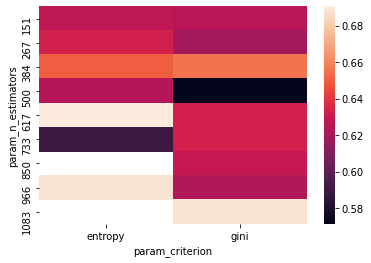

In [44]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(RF_newmodel.cv_results_),
    values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
     
plot = sns.heatmap(table)
figure = plot.get_figure() 
figure.savefig('heatmap_RF.png', dpi=400)

In [45]:
# Importing necessary libraries and printing the train score for RF
from sklearn.metrics import accuracy_score
train_predictforest = RF_newmodel.best_estimator_.predict(RF_train)
print(confusion_matrix(knn_label_train,train_predictforest))
print(classification_report(knn_label_train,train_predictforest))
RF_train_accuracy = accuracy_score(knn_label_train,train_predictforest)
print(RF_train_accuracy)

[[236 112   4]
 [  2 356   1]
 [103  94 142]]
              precision    recall  f1-score   support

     Abdomen       0.69      0.67      0.68       352
       Chest       0.63      0.99      0.77       359
        Head       0.97      0.42      0.58       339

    accuracy                           0.70      1050
   macro avg       0.76      0.69      0.68      1050
weighted avg       0.76      0.70      0.68      1050

0.699047619047619


In [46]:
# saving the RF model
with open('1106937_RF.pkl', 'wb') as f:
    pickle.dump(RF_newmodel, f)

# loading the pickle model
with open('1106937_RF.pkl', 'rb') as f:
    RF_loadedModel = pickle.load(f)

In [47]:
# Importing necessary libraries and printing the test score for RF

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

# Using the loaded model to fit and compile the model with testing parameters

predictionforest = RF_loadedModel.best_estimator_.predict(RF_test)
print("\nConfusion Matrix RF\n",confusion_matrix(knn_label_test,predictionforest))
print("\nReport RF\n",classification_report(knn_label_test,predictionforest))
RF_test_accuracy = (accuracy_score(knn_label_test,predictionforest))*100
print('Accuracy of RF model is equal ' + str(round(RF_test_accuracy, 2)) + ' %.')


Confusion Matrix RF
 [[ 88  60   0]
 [  1 140   0]
 [ 61  41  59]]

Report RF
               precision    recall  f1-score   support

     Abdomen       0.59      0.59      0.59       148
       Chest       0.58      0.99      0.73       141
        Head       1.00      0.37      0.54       161

    accuracy                           0.64       450
   macro avg       0.72      0.65      0.62       450
weighted avg       0.73      0.64      0.62       450

Accuracy of RF model is equal 63.78 %.
